In [1]:
import pandas as pd
import numpy as np
import urllib.request as url
import json

In [2]:
res = url.urlopen('https://data.covid19india.org/states_daily.json')
data = json.load(res)

In [3]:
type(data)

dict

In [4]:
states = data['states_daily']

In [5]:
df = pd.DataFrame(states)

In [6]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [7]:
df.columns

Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dateymd', 'dd', 'dl',
       'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh',
       'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status',
       'tg', 'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'],
      dtype='object')

In [8]:
# df[df['status'] == 'Confirmed']['tt'].sum()

In [9]:
df['dl'] = df['dl'].astype('int')
df['mh'] = df['mh'].astype('int')
df['rj'] = df['rj'].astype('int')
df['hr'] = df['hr'].astype('int')
df['tt'] = df['tt'].astype('int')

In [10]:
df[df['status'] == 'Confirmed']['tt'].sum()

32249044

In [11]:
df['dateymd'][0]

'2020-03-14'

In [12]:
df['dateymd'] = pd.to_datetime(df['dateymd'])

In [13]:
df['dateymd'][0]

Timestamp('2020-03-14 00:00:00')

In [14]:
confirmed_df = df[df['status'] == 'Confirmed']
recovered_df = df[df['status'] == 'Recovered']
deceased_df = df[df['status'] == 'Deceased']

In [15]:
confirmed_df['dl'].sum()

1437118

In [16]:
deceased_df['dl'].sum()

25069

In [17]:
deceased_df['tt'].sum()

432117

In [18]:
import matplotlib.pyplot as plt

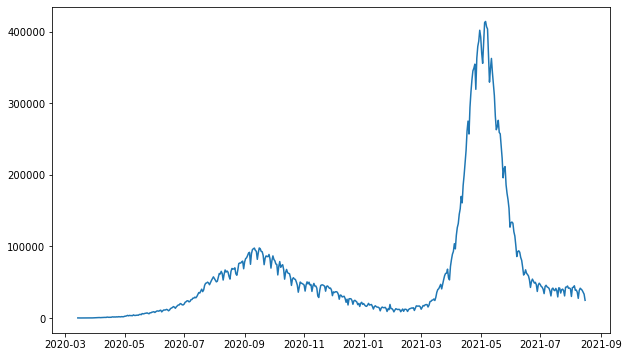

In [20]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['tt'])
plt.show()

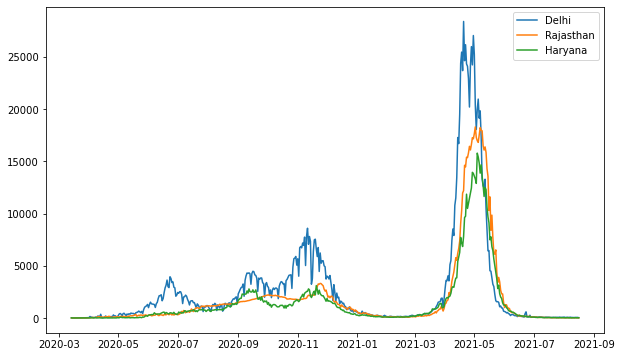

In [22]:
plt.figure(figsize=(10,6))
plt.plot(confirmed_df['dateymd'], confirmed_df['dl'], label='Delhi')
plt.plot(confirmed_df['dateymd'], confirmed_df['rj'], label='Rajasthan')
plt.plot(confirmed_df['dateymd'], confirmed_df['hr'], label='Haryana')
plt.legend()
plt.show()

In [27]:
top_10 = confirmed_df.sort_values(by='tt', ascending=False)[:10]

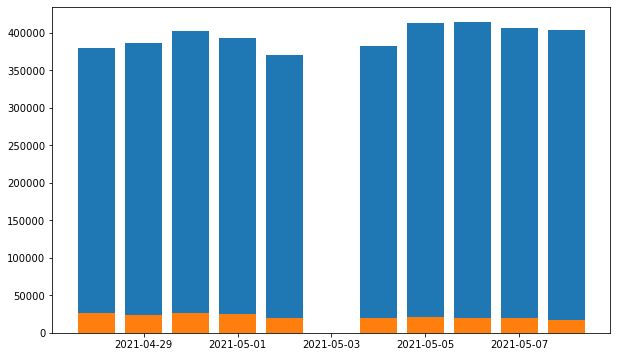

In [33]:
# Stacked Bar Plot
plt.figure(figsize=(10,6))
plt.bar(top_10['dateymd'], top_10['tt'], label='Total')
plt.bar(top_10['dateymd'], top_10['dl'], label='Delhi')
plt.show()

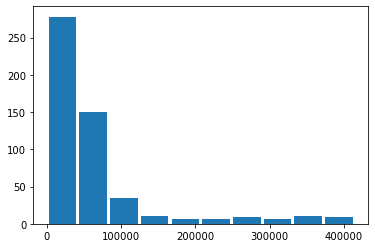

In [37]:
plt.hist(confirmed_df['tt'], rwidth=0.9)
plt.show()